In [1]:
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(version = "3.19")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'cpp11', 'curl', 'data.table', 'digest', 'gert', 'hexbin',
  'httr2', 'MASS', 'Matrix', 'nlme', 'openssl', 'pbdZMQ', 'rmarkdown', 'waldo',
  'xfun'



In [3]:
install.packages("locfit")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
if (!("limma" %in% installed.packages())) {
  # Install DESeq2
  BiocManager::install("limma", update = FALSE)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'limma'

also installing the dependency ‘statmod’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
if (!("edgeR" %in% installed.packages())) {
  # Install DESeq2
  BiocManager::install("edgeR", update = FALSE)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'edgeR'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [110]:
library("limma")
library("tidyverse")

In [111]:
set.seed(12345)

In [112]:
dip1 <- read.csv("iPSC 1.csv")
dip2 <- read.csv("iPSC 2.csv")
dip3 <- read.csv("iPSC 3.csv")
dip4 <- read.csv("iPSC 4.csv")
d131 <- read.csv("MN D13-1.csv")
d132 <- read.csv("MN D13-2.csv")
d133 <- read.csv("MN D13-3.csv")
d134 <- read.csv("MN D13-4.csv")
d201 <- read.csv("MN D20-1.csv")
d202 <- read.csv("MN D20-2.csv")
d203 <- read.csv("MN D20-3.csv")
d204 <- read.csv("MN D20-4.csv")
d271 <- read.csv("MN D27-1.csv")
d272 <- read.csv("MN D27-2.csv")
d273 <- read.csv("MN D27-3.csv")
d274 <- read.csv("MN D27-4.csv")

In [113]:
dip1_FPKM <- dip1$FPKM
dip2_FPKM <- dip2$FPKM
dip3_FPKM <- dip3$FPKM
dip4_FPKM <- dip4$FPKM
d131_FPKM <- d131$FPKM
d132_FPKM <- d132$FPKM
d133_FPKM <- d133$FPKM
d134_FPKM <- d134$FPKM
d201_FPKM <- d201$FPKM
d202_FPKM <- d202$FPKM
d203_FPKM <- d203$FPKM
d204_FPKM <- d204$FPKM
d271_FPKM <- d271$FPKM
d272_FPKM <- d272$FPKM
d273_FPKM <- d273$FPKM
d274_FPKM <- d274$FPKM

dip1 <- cbind(dip1, dip2_FPKM, dip3_FPKM, dip4_FPKM, d131_FPKM, d132_FPKM, d133_FPKM, d134_FPKM, 
             d201_FPKM, d202_FPKM, d203_FPKM, d204_FPKM, 
             d271_FPKM, d272_FPKM, d273_FPKM, d274_FPKM)

d131 <- cbind(d131, d132_FPKM, d133_FPKM, d134_FPKM, 
             d201_FPKM, d202_FPKM, d203_FPKM, d204_FPKM, 
             d271_FPKM, d272_FPKM, d273_FPKM, d274_FPKM)
glimpse(dip1)
glimpse(d131)

Rows: 63,225
Columns: 17
$ gene_short_name <chr> "OR4G4P", "FAM138A", "MIR1302-2HG", "MIR1302-2", "-", …
$ FPKM            <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ dip2_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ dip3_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0522256,…
$ dip4_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ d131_FPKM       <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.0171…
$ d132_FPKM       <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000,…
$ d133_FPKM       <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000,…
$ d134_FPKM       <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000,…
$ d201_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580,…
$ d202_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000,…
$ d203_FPKM       <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827,…
$ d204_FPKM    

In [114]:
df <- data.frame(dip1["gene_short_name"], dip1["FPKM"], dip1["dip2_FPKM"], dip1["dip3_FPKM"], dip1["dip4_FPKM"], dip1["d131_FPKM"], dip1["d132_FPKM"], dip1["d133_FPKM"], dip1["d134_FPKM"], 
                 dip1["d201_FPKM"], dip1["d202_FPKM"], dip1["d203_FPKM"], dip1["d204_FPKM"], 
                 dip1["d271_FPKM"], dip1["d272_FPKM"], dip1["d273_FPKM"], dip1["d274_FPKM"])

dc <- data.frame(d131["gene_short_name"], d131["FPKM"], d131["d132_FPKM"], d131["d133_FPKM"], d131["d134_FPKM"], 
                 d131["d201_FPKM"], d131["d202_FPKM"], d131["d203_FPKM"], d131["d204_FPKM"], 
                 d131["d271_FPKM"], d131["d272_FPKM"], d131["d273_FPKM"], d131["d274_FPKM"])

colnames(df) <- c("Gene", "iPSC_1", "iPSC_2", "iPSC_3", "iPSC_4", "MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")

colnames(dc) <- c("Gene", "MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")
glimpse(dc)
glimpse(df)

Rows: 63,225
Columns: 13
$ Gene   <chr> "MIR1302-2HG", "MIR1302-2", "DDX11L2", "DDX11L1", "FAM138A", "O…
$ MN13_1 <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.01718860, 0.0…
$ MN13_2 <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN13_3 <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000, 0.027586…
$ MN13_4 <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000, 0.289374…
$ MN20_1 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580, 0.000000…
$ MN20_2 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN20_3 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827, 0.063394…
$ MN20_4 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_1 <dbl> 0.0401068, 0.1911110, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_2 <dbl> 0.0118849, 0.0000000, 0.0000000, 0.1276030, 0.0000000, 0.433228…
$ MN27_3 <dbl> 0.18764800, 0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.0…
$ MN27_4 <dbl> 

In [115]:
dc <- subset(dc, Gene != "-")
dc <- dc[!duplicated(dc[c("Gene")]), ]
glimpse(dc)

df <- subset(df, Gene != "-")
df <- df[!duplicated(df[c("Gene")]), ]
glimpse(df)

Rows: 41,023
Columns: 13
$ Gene   <chr> "MIR1302-2HG", "MIR1302-2", "DDX11L2", "DDX11L1", "FAM138A", "O…
$ MN13_1 <dbl> 0.00000000, 0.00000000, 0.12343800, 0.00000000, 0.01718860, 0.0…
$ MN13_2 <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN13_3 <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000, 0.027586…
$ MN13_4 <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000, 0.289374…
$ MN20_1 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580, 0.000000…
$ MN20_2 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN20_3 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827, 0.063394…
$ MN20_4 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_1 <dbl> 0.0401068, 0.1911110, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_2 <dbl> 0.0118849, 0.0000000, 0.0000000, 0.1276030, 0.0000000, 0.433228…
$ MN27_3 <dbl> 0.1876480, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_4 <dbl> 

In [84]:
dc <- dc %>% mutate(MN13_1 = log2((MN13_1 + 0.1)))
glimpse(dc)

df <- df %>% mutate(MN13_1 = log2((MN13_1 + 0.1)))
glimpse(df)

Rows: 41,023
Columns: 13
$ Gene   <chr> "MIR1302-2HG", "MIR1302-2", "DDX11L2", "DDX11L1", "FAM138A", "O…
$ MN13_1 <dbl> -3.3219281, -3.3219281, -2.1620535, -3.3219281, -3.0930959, -3.…
$ MN13_2 <dbl> 0.0529516, 0.0520208, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN13_3 <dbl> 0.0336902, 0.0000000, 0.0167614, 0.0000000, 0.0000000, 0.027586…
$ MN13_4 <dbl> 0.0000000, 0.0000000, 0.1537640, 0.0469125, 0.0000000, 0.289374…
$ MN20_1 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.1260580, 0.000000…
$ MN20_2 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN20_3 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0500827, 0.063394…
$ MN20_4 <dbl> 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_1 <dbl> 0.0401068, 0.1911110, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_2 <dbl> 0.0118849, 0.0000000, 0.0000000, 0.1276030, 0.0000000, 0.433228…
$ MN27_3 <dbl> 0.1876480, 0.0000000, 0.0000000, 0.0000000, 0.0000000, 0.000000…
$ MN27_4 <dbl> 

In [85]:
dc <- dc %>% mutate(MN13_2 = log2((MN13_2 + 0.1)))
dc <- dc %>% mutate(MN13_3 = log2((MN13_3 + 0.1)))
dc <- dc %>% mutate(MN13_4 = log2((MN13_4 + 0.1)))
dc <- dc %>% mutate(MN20_1 = log2((MN20_1 + 0.1)))
dc <- dc %>% mutate(MN20_2 = log2((MN20_2 + 0.1)))
dc <- dc %>% mutate(MN20_3 = log2((MN20_3 + 0.1)))
dc <- dc %>% mutate(MN20_4 = log2((MN20_4 + 0.1)))
dc <- dc %>% mutate(MN27_1 = log2((MN27_1 + 0.1)))
dc <- dc %>% mutate(MN27_2 = log2((MN27_2 + 0.1)))
dc <- dc %>% mutate(MN27_3 = log2((MN27_3 + 0.1)))
dc <- dc %>% mutate(MN27_4 = log2((MN27_4 + 0.1)))
glimpse(dc)

df <- df %>% mutate(iPSC_1 = log2((iPSC_1 + 0.1)))
df <- df %>% mutate(iPSC_2 = log2((iPSC_2 + 0.1)))
df <- df %>% mutate(iPSC_3 = log2((iPSC_3 + 0.1)))
df <- df %>% mutate(iPSC_4 = log2((iPSC_4 + 0.1)))

df <- df %>% mutate(MN13_2 = log2((MN13_2 + 0.1)))
df <- df %>% mutate(MN13_3 = log2((MN13_3 + 0.1)))
df <- df %>% mutate(MN13_4 = log2((MN13_4 + 0.1)))
df <- df %>% mutate(MN20_1 = log2((MN20_1 + 0.1)))
df <- df %>% mutate(MN20_2 = log2((MN20_2 + 0.1)))
df <- df %>% mutate(MN20_3 = log2((MN20_3 + 0.1)))
df <- df %>% mutate(MN20_4 = log2((MN20_4 + 0.1)))
df <- df %>% mutate(MN27_1 = log2((MN27_1 + 0.1)))
df <- df %>% mutate(MN27_2 = log2((MN27_2 + 0.1)))
df <- df %>% mutate(MN27_3 = log2((MN27_3 + 0.1)))
df <- df %>% mutate(MN27_4 = log2((MN27_4 + 0.1)))
glimpse(df)

Rows: 41,023
Columns: 13
$ Gene   <chr> "MIR1302-2HG", "MIR1302-2", "DDX11L2", "DDX11L1", "FAM138A", "O…
$ MN13_1 <dbl> -3.3219281, -3.3219281, -2.1620535, -3.3219281, -3.0930959, -3.…
$ MN13_2 <dbl> -2.70885290, -2.71765936, -3.32192809, -3.32192809, -3.32192809…
$ MN13_3 <dbl> -2.9030344, -3.3219281, -3.0983647, -3.3219281, -3.3219281, -2.…
$ MN13_4 <dbl> -3.32192809, -3.32192809, -1.97844068, -2.76697094, -3.32192809…
$ MN20_1 <dbl> -3.3219281, -3.3219281, -3.3219281, -3.3219281, -2.1452351, -3.…
$ MN20_2 <dbl> -3.3219281, -3.3219281, -3.3219281, -3.3219281, -3.3219281, -3.…
$ MN20_3 <dbl> -3.32192809, -3.32192809, -3.32192809, -3.32192809, -2.73617041…
$ MN20_4 <dbl> -3.3219281, -3.3219281, -3.3219281, -3.3219281, -3.3219281, -3.…
$ MN27_1 <dbl> -2.83540112, -1.78035874, -3.32192809, -3.32192809, -3.32192809…
$ MN27_2 <dbl> -3.1599128, -3.3219281, -3.3219281, -2.1354085, -3.3219281, -0.…
$ MN27_3 <dbl> -1.7976237, -3.3219281, -3.3219281, -3.3219281, -3.3219281, -3.…
$ MN27_4 <dbl> 

In [116]:
x <- c("MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")
y <- c("iPSC_1", "iPSC_2", "iPSC_3", "iPSC_4", "MN13_1", "MN13_2", "MN13_3", "MN13_4", 
                  "MN20_1", "MN20_2", "MN20_3", "MN20_4", 
                  "MN27_1", "MN27_2", "MN27_3", "MN27_4")
fac <- factor(substring(x, 1, 4))
fact <- factor(substring(y, 1, 4))
print(fac)
print(fact)

 [1] MN13 MN13 MN13 MN13 MN20 MN20 MN20 MN20 MN27 MN27 MN27 MN27
Levels: MN13 MN20 MN27
 [1] iPSC iPSC iPSC iPSC MN13 MN13 MN13 MN13 MN20 MN20 MN20 MN20 MN27 MN27 MN27
[16] MN27
Levels: iPSC MN13 MN20 MN27


In [117]:
rownames(dc) <- NULL
pm <- dc %>% 
column_to_rownames("Gene") %>%
as.matrix()

rownames(df) <- NULL
pc <- df %>% 
column_to_rownames("Gene") %>%
as.matrix()

In [118]:
glimpse(pm)
glimpse(pc)

 num [1:41023, 1:12] 0 0 0.1234 0 0.0172 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "MIR1302-2HG" "MIR1302-2" "DDX11L2" "DDX11L1" ...
  ..$ : chr [1:12] "MN13_1" "MN13_2" "MN13_3" "MN13_4" ...
 num [1:41023, 1:16] 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "OR4G4P" "FAM138A" "MIR1302-2HG" "MIR1302-2" ...
  ..$ : chr [1:16] "iPSC_1" "iPSC_2" "iPSC_3" "iPSC_4" ...


In [119]:
head(pm)
head(pc)

,MN13_1,MN13_2,MN13_3,MN13_4,MN20_1,MN20_2,MN20_3,MN20_4,MN27_1,MN27_2,MN27_3,MN27_4
MIR1302-2HG,0.0000000,0.0529516,0.0336902,0.0000000,0.000000,0,0.0000000,0,0.0401068,0.0118849,0.187648,0
MIR1302-2,0.0000000,0.0520208,0.0000000,0.0000000,0.000000,0,0.0000000,0,0.1911110,0.0000000,0.000000,0
DDX11L2,0.1234380,0.0000000,0.0167614,0.1537640,0.000000,0,0.0000000,0,0.0000000,0.0000000,0.000000,0
DDX11L1,0.0000000,0.0000000,0.0000000,0.0469125,0.000000,0,0.0000000,0,0.0000000,0.1276030,0.000000,0
FAM138A,0.0171886,0.0000000,0.0000000,0.0000000,0.126058,0,0.0500827,0,0.0000000,0.0000000,0.000000,0
OR4G4P,0.0000000,0.0000000,0.0275869,0.2893740,0.000000,0,0.0633945,0,0.0000000,0.4332280,0.000000,0


,iPSC_1,iPSC_2,iPSC_3,iPSC_4,MN13_1,MN13_2,MN13_3,MN13_4,MN20_1,MN20_2,MN20_3,MN20_4,MN27_1,MN27_2,MN27_3,MN27_4
OR4G4P,0,0,0.000000,0,0.0000000,0.0529516,0.0336902,0.0000000,0.0000000,0,0.0000000,0,0.0401068,0.0118849,0.1876480,0
FAM138A,0,0,0.000000,0,0.0000000,0.0520208,0.0000000,0.0000000,0.0000000,0,0.0000000,0,0.1911110,0.0000000,0.0000000,0
MIR1302-2HG,0,0,0.000000,0,0.1234380,0.0000000,0.0167614,0.1537640,0.0000000,0,0.0000000,0,0.0000000,0.0000000,0.0000000,0
MIR1302-2,0,0,0.000000,0,0.0000000,0.0000000,0.0000000,0.0469125,0.0000000,0,0.0000000,0,0.0000000,0.1276030,0.0000000,0
OR4G11P,0,0,0.000000,0,0.0000000,0.0000000,0.0275869,0.2893740,0.0000000,0,0.0633945,0,0.0000000,0.4332280,0.0000000,0
DDX11L2,0,0,0.163519,0,0.0991514,0.2264560,0.1945570,0.0000000,0.0386874,0,0.0000000,0,0.2463820,0.0000000,0.0800287,0


In [120]:

pm <- pm[complete.cases(pm), ]
pm <- pm[, colSums(is.na(pm)) == 0]
glimpse(pm)


pc <- pc[complete.cases(pc), ]
pc <- pc[, colSums(is.na(pc)) == 0]
glimpse(pc)

 num [1:41023, 1:12] 0 0 0.1234 0 0.0172 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "MIR1302-2HG" "MIR1302-2" "DDX11L2" "DDX11L1" ...
  ..$ : chr [1:12] "MN13_1" "MN13_2" "MN13_3" "MN13_4" ...
 num [1:41023, 1:16] 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "OR4G4P" "FAM138A" "MIR1302-2HG" "MIR1302-2" ...
  ..$ : chr [1:16] "iPSC_1" "iPSC_2" "iPSC_3" "iPSC_4" ...


In [121]:
library(edgeR)

LCPM <- cpm(pm, log=TRUE, prior.count = 3)
glimpse(LCPM)

LogCPM <- cpm(pc, log=TRUE, prior.count = 3)
glimpse(LogCPM)

 num [1:41023, 1:12] 3.82 3.82 3.85 3.82 3.82 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "MIR1302-2HG" "MIR1302-2" "DDX11L2" "DDX11L1" ...
  ..$ : chr [1:12] "MN13_1" "MN13_2" "MN13_3" "MN13_4" ...
 num [1:41023, 1:16] 3.51 3.51 3.51 3.51 3.51 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:41023] "OR4G4P" "FAM138A" "MIR1302-2HG" "MIR1302-2" ...
  ..$ : chr [1:16] "iPSC_1" "iPSC_2" "iPSC_3" "iPSC_4" ...


In [122]:
ff <- factor(c(rep("MN13", 4), rep("MN20", 4), rep("MN27", 4)))
fc <- factor(c(rep("iPSC", 4), rep("MN13", 4), rep("MN20", 4), rep("MN27", 4)))


samples <- data.frame(
  sampleID = colnames(pm),
  group = ff)

is.data.frame(samples)

print(samples)

Sample <- data.frame(
  samplesID = colnames(pc),
  groups = fc)

is.data.frame(Sample)

print(Sample)


design <- model.matrix(~group, data = samples)
colnames(design) <- c("MN13", "MN20", "MN27")
print(design)

design1 <- model.matrix(~groups, data = Sample)
colnames(design1) <- c("iPSC", "MN13", "MN20", "MN27")
print(design1)

[1] TRUE

   sampleID group
1    MN13_1  MN13
2    MN13_2  MN13
3    MN13_3  MN13
4    MN13_4  MN13
5    MN20_1  MN20
6    MN20_2  MN20
7    MN20_3  MN20
8    MN20_4  MN20
9    MN27_1  MN27
10   MN27_2  MN27
11   MN27_3  MN27
12   MN27_4  MN27


[1] TRUE

   samplesID groups
1     iPSC_1   iPSC
2     iPSC_2   iPSC
3     iPSC_3   iPSC
4     iPSC_4   iPSC
5     MN13_1   MN13
6     MN13_2   MN13
7     MN13_3   MN13
8     MN13_4   MN13
9     MN20_1   MN20
10    MN20_2   MN20
11    MN20_3   MN20
12    MN20_4   MN20
13    MN27_1   MN27
14    MN27_2   MN27
15    MN27_3   MN27
16    MN27_4   MN27
   MN13 MN20 MN27
1     1    0    0
2     1    0    0
3     1    0    0
4     1    0    0
5     1    1    0
6     1    1    0
7     1    1    0
8     1    1    0
9     1    0    1
10    1    0    1
11    1    0    1
12    1    0    1
attr(,"assign")
[1] 0 1 1
attr(,"contrasts")
attr(,"contrasts")$group
[1] "contr.treatment"

   iPSC MN13 MN20 MN27
1     1    0    0    0
2     1    0    0    0
3     1    0    0    0
4     1    0    0    0
5     1    1    0    0
6     1    1    0    0
7     1    1    0    0
8     1    1    0    0
9     1    0    1    0
10    1    0    1    0
11    1    0    1    0
12    1    0    1    0
13    1    0    0    1
14    1    

In [123]:
cont_Matrix <- makeContrasts(M13vM20 = MN13-MN20, M13vM27 = MN13-MN27, levels = design)
cont_Matrix1 <- makeContrasts(iPSCvMN13 = iPSC-MN13, iPSCvM20 = iPSC-MN20, iPSCvM27 = iPSC-MN27, levels = design1)

In [124]:
fit <- lmFit(LCPM, design)
fit1 <- lmFit(LogCPM, design1)

In [125]:
fit_cont <- contrasts.fit(fit, cont_Matrix)
fit_cont <- contrasts.fit(fit1, cont_Matrix1)

In [126]:
fit <- eBayes(fit, trend = TRUE)
fit1 <- eBayes(fit1, trend = TRUE)

In [127]:
topTable(fit, coef=ncol(design))

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GTF2I,-2.0609958,4.584236,-7.250525,1.866950e-05,0.4094059,-3.526951
RN7SKP1,2.1086206,4.689159,7.163369,2.082756e-05,0.4094059,-3.532424
ASAH2B,-0.1888180,3.900467,-6.879315,2.993973e-05,0.4094059,-3.551332
EEF1G,-2.6816385,5.570241,-6.475456,5.103857e-05,0.4777680,-3.581326
SNORA66,-4.2668441,5.537995,-6.193249,7.503195e-05,0.4777680,-3.604733
GPR199P,1.9380181,4.546359,6.160531,7.851389e-05,0.4777680,-3.607589
GPC3,-0.3070189,3.927043,-5.865958,1.188964e-04,0.4777680,-3.634741
RNASEH2C,-1.1851535,4.260204,-5.861921,1.195844e-04,0.4777680,-3.635132
KBTBD6,-0.3379145,3.954073,-5.847584,1.220623e-04,0.4777680,-3.636524


In [128]:
topTable(fit1, coef=ncol(design1))

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RN7SK,-12.0334754,7.010828,-22.11777,3.403748e-12,8.195973e-08,14.65179
COX7A2,-4.2227244,4.607614,-21.85614,3.995794e-12,8.195973e-08,14.57430
H2AC21,-5.4429345,5.248753,-20.56425,9.067643e-12,1.239940e-07,14.16297
FOXD3-AS1,-4.8051157,4.896084,-20.10042,1.231483e-11,1.262979e-07,14.00272
VPS13B,-0.4223723,3.612452,-17.43463,8.221371e-11,6.745306e-07,12.92866
HDAC2,-3.3818307,4.404864,-15.98698,2.586742e-10,1.768598e-06,12.21429
H2AC20,-7.2109241,5.501754,-15.64758,3.430623e-10,2.010492e-06,12.03090
POLR1D,-2.8441486,4.238065,-15.16881,5.157905e-10,2.644909e-06,11.76095
IPO4,-2.2555130,4.070737,-14.41391,1.004909e-09,4.580485e-06,11.30671


In [129]:
fit <- lmFit(LCPM, design)
fit <- treat(fit, lfc=log2(1.2), trend=TRUE)
topTreat(fit, coef=ncol(design))

,logFC,AveExpr,t,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GTF2I,-2.060996,4.584236,-6.325177,3.437400e-05,0.7649592
RN7SKP1,2.108621,4.689159,6.269793,3.729416e-05,0.7649592
EEF1G,-2.681639,5.570241,-5.840297,7.280295e-05,0.8882199
SNORA66,-4.266844,5.537995,-5.811459,8.660701e-05,0.8882199
GPR199P,1.938018,4.546359,5.324403,1.444381e-04,1.0000000
RNASEH2C,-1.185154,4.260204,-4.560919,4.431415e-04,1.0000000
RPL5,-4.243891,5.609872,-4.729979,4.557407e-04,1.0000000
DUSP1,-1.075075,4.187386,-4.157498,8.541378e-04,1.0000000
IGFBP7,3.176642,6.311891,4.296723,8.588815e-04,1.0000000


In [130]:
fit1 <- lmFit(LogCPM, design1)
fit1 <- treat(fit1, lfc=log2(1.2), trend=TRUE)
topTreat(fit1, coef=ncol(design1))

,logFC,AveExpr,t,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RN7SK,-12.033475,7.010828,-21.63431,3.563507e-12,1.154548e-07
COX7A2,-4.222724,4.607614,-20.49471,5.628785e-12,1.154548e-07
H2AC21,-5.442934,5.248753,-19.57046,1.121133e-11,1.533075e-07
FOXD3-AS1,-4.805116,4.896084,-19.00011,1.609029e-11,1.650180e-07
H2AC20,-7.210924,5.501754,-15.07680,3.863100e-10,2.886458e-06
HDAC2,-3.381831,4.404864,-14.74354,4.221717e-10,2.886458e-06
POLR1D,-2.844149,4.238065,-13.76596,9.938038e-10,5.824116e-06
IPO4,-2.255513,4.070737,-12.73298,2.614067e-09,1.340461e-05
H1-1,-3.499945,4.810634,-12.56291,3.387916e-09,1.544250e-05


In [131]:
print(cont_Matrix1)

      Contrasts
Levels iPSCvMN13 iPSCvM20 iPSCvM27
  iPSC         1        1        1
  MN13        -1        0        0
  MN20         0       -1        0
  MN27         0        0       -1


In [132]:
print(cont_Matrix)

      Contrasts
Levels M13vM20 M13vM27
  MN13       1       1
  MN20      -1       0
  MN27       0      -1


In [133]:
cfit <- contrasts.fit(fit, cont_Matrix)

In [134]:
cfit1 <- contrasts.fit(fit1, cont_Matrix1)
cfit <- eBayes(cfit, trend = TRUE)
cfit1 <- eBayes(cfit1, trend = TRUE)

In [135]:
head(cfit)

An object of class "MArrayLM"
$coefficients
             Contrasts
               M13vM20  M13vM27
  MIR1302-2HG 3.863839 3.839259
  MIR1302-2   3.838902 3.819765
  DDX11L2     3.935255 3.935255
  DDX11L1     3.847668 3.823491
  FAM138A     3.794130 3.821359
  OR4G4P      3.974639 3.922662

$rank
[1] 3

$assign
[1] 0 1 1

$qr
$qr
        MN13       MN20        MN27
1 -3.4641016 -1.1547005 -1.15470054
2  0.2886751  1.6329932 -0.81649658
3  0.2886751  0.1583985  1.41421356
4  0.2886751  0.1583985  0.23683920
5  0.2886751 -0.4539740  0.02831961
7 more rows ...

$qraux
[1] 1.288675 1.158398 1.236839

$pivot
[1] 1 2 3

$tol
[1] 1e-07

$rank
[1] 3


$df.residual
[1] 9 9 9 9 9 9

$sigma
MIR1302-2HG   MIR1302-2     DDX11L2     DDX11L1     FAM138A      OR4G4P 
 0.02412738  0.02482350  0.04682572  0.03236243  0.02111785  0.12815665 

$cov.coefficients
         Contrasts
Contrasts M13vM20 M13vM27
  M13vM20    1.25    1.00
  M13vM27    1.00    1.25

$stdev.unscaled
             M13vM20  M13vM27
MI

In [136]:
head(cfit1)

An object of class "MArrayLM"
$coefficients
             Contrasts
              iPSCvMN13 iPSCvM20 iPSCvM27
  OR4G4P       3.479324 3.506859 3.478298
  FAM138A      3.492942 3.506859 3.484244
  MIR1302-2HG  3.434718 3.506859 3.506859
  MIR1302-2    3.488916 3.506859 3.477150
  OR4G11P      3.397205 3.477680 3.414599
  DDX11L2      3.391498 3.524446 3.489543

$rank
[1] 4

$assign
[1] 0 1 1 1

$qr
$qr
   iPSC       MN13        MN20        MN27
1 -4.00 -1.0000000 -1.00000000 -1.00000000
2  0.25  1.7320508 -0.57735027 -0.57735027
3  0.25  0.1154701  1.63299316 -0.81649658
4  0.25  0.1154701  0.14639507  1.41421356
5  0.25 -0.4618802  0.02679216  0.04047939
11 more rows ...

$qraux
[1] 1.250000 1.115470 1.146395 1.221184

$pivot
[1] 1 2 3 4

$tol
[1] 1e-07

$rank
[1] 4


$df.residual
[1] 12 12 12 12 12 12

$sigma
     OR4G4P     FAM138A MIR1302-2HG   MIR1302-2     OR4G11P     DDX11L2 
 0.02453414  0.02655422  0.05094506  0.03470680  0.13600154  0.07658007 

$cov.coefficients
           Con

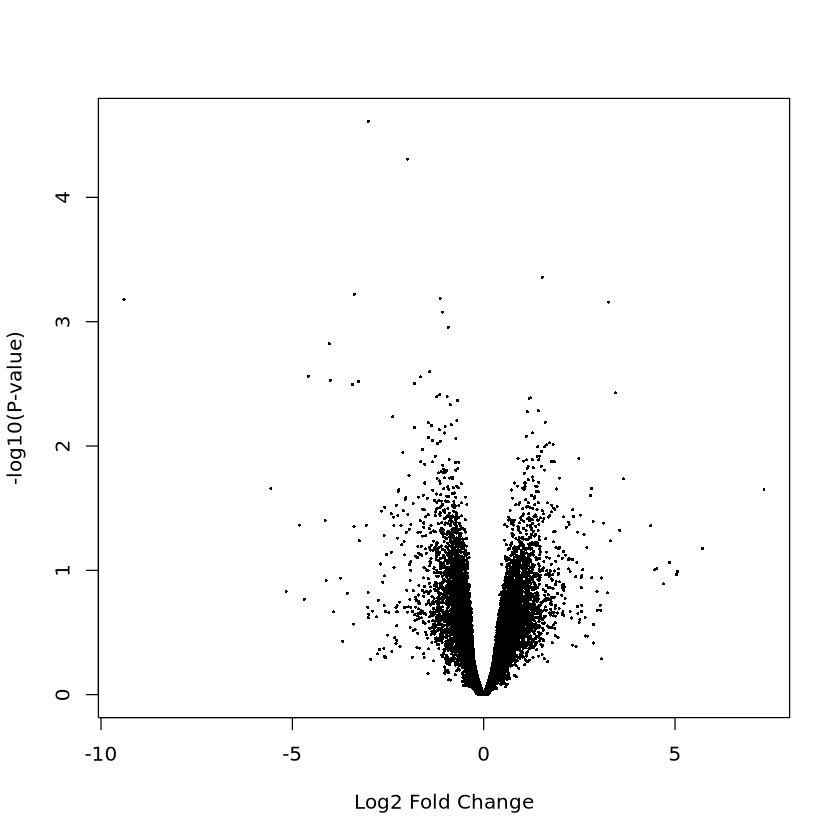

In [137]:
volcanoplot(fit, coef=2, style = "p-value", highlight = 0, name = fit$Gene, hl.col="blue")

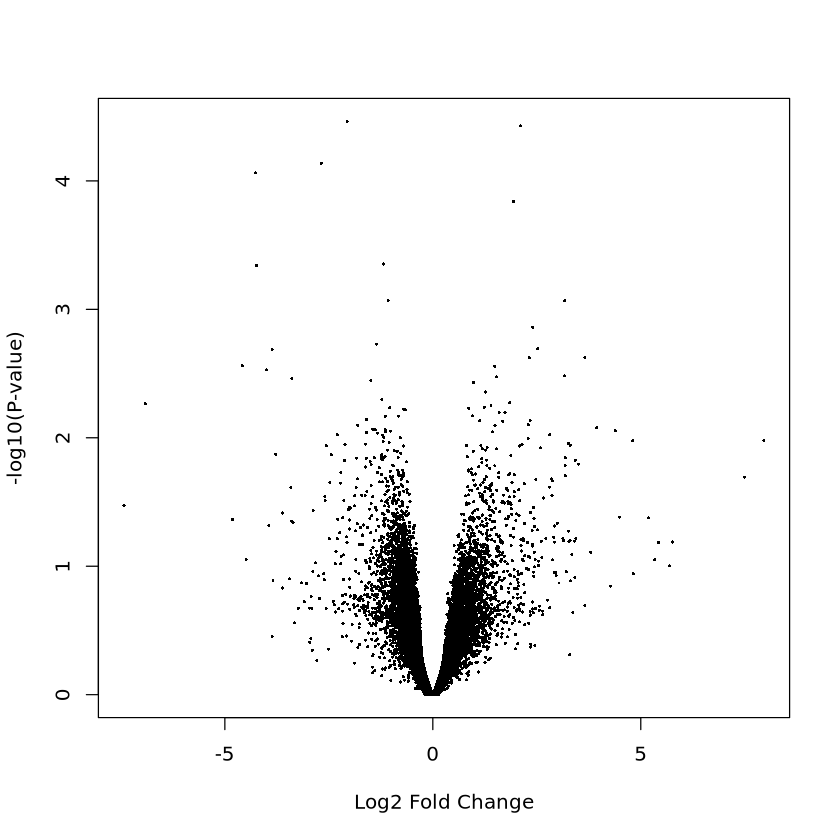

In [138]:
volcanoplot(fit, coef=3, style = "p-value", highlight = 0, name = fit$Gene, hl.col="blue")

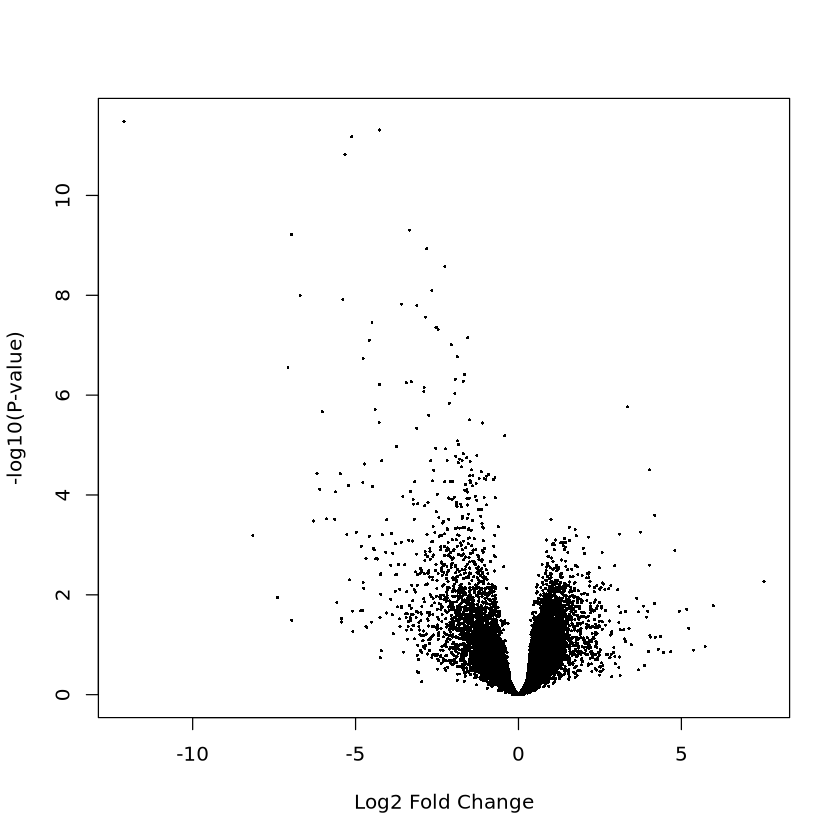

In [139]:
volcanoplot(fit1, coef=2, style = "p-value", highlight = 0, name = fit$Gene, hl.col="blue")

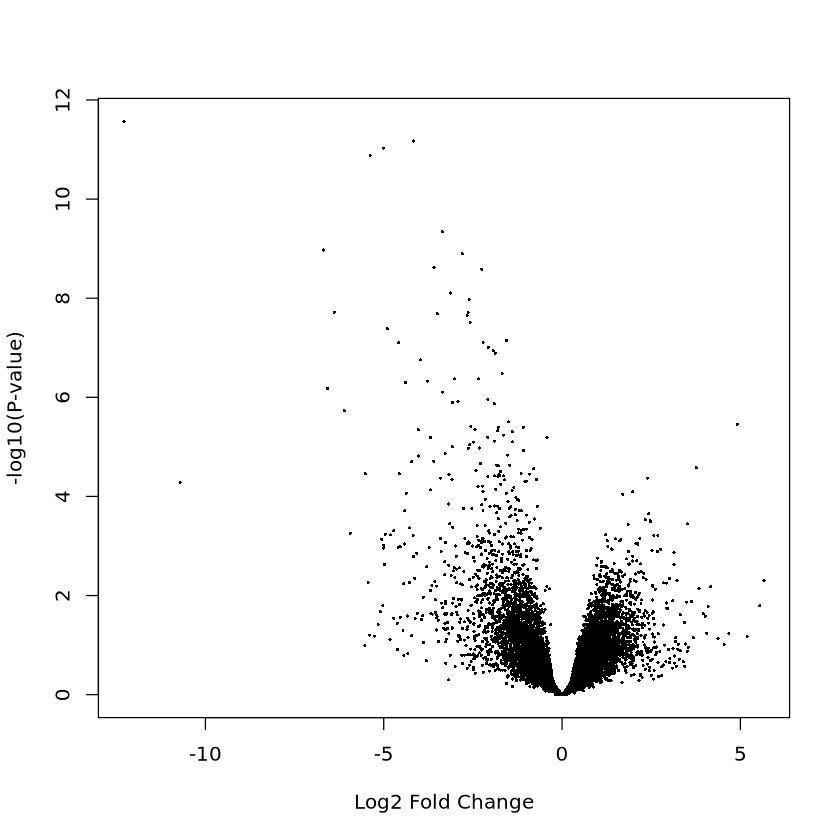

In [140]:
volcanoplot(fit1, coef=3, style = "p-value", highlight = 0, name = fit$Gene, hl.col="blue")

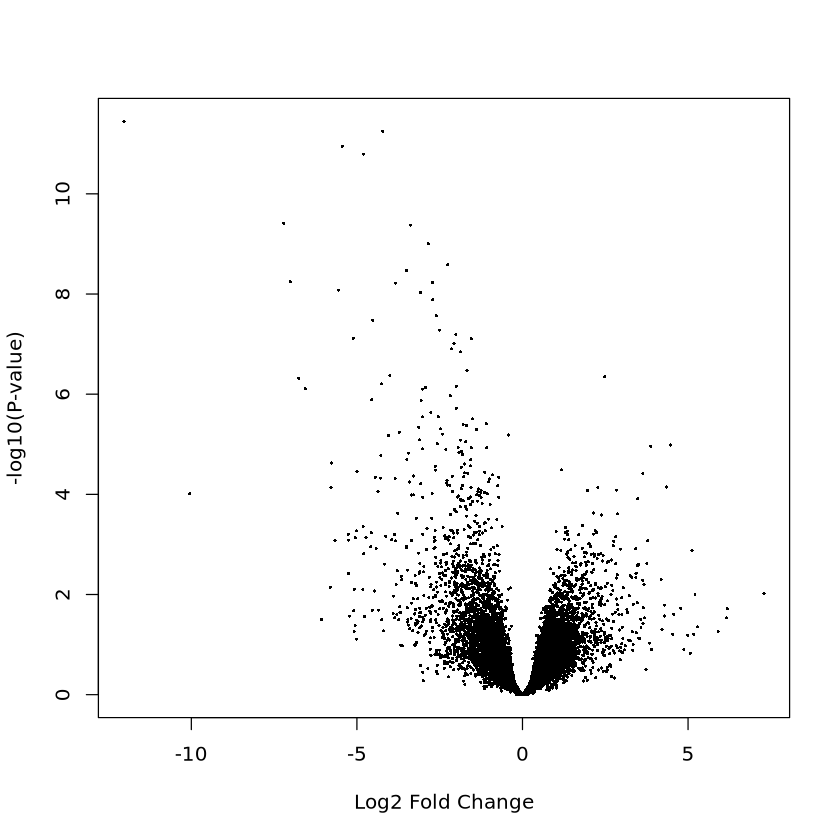

In [141]:
volcanoplot(fit1, coef=4, style = "p-value", highlight = 0, name = fit$Gene, hl.col="blue")